Лабораторна робота 4
Варіант 11

Завдання 1. Завантажити Diabetes Dataset
Цей датасет містить 10 фізіологічних змінних (вік, стать, індекс маси
тіла, артеріальний тиск та інші) та одну цільову змінну, яка представляє
прогрес діабету через рік після вихідних даних.
Провести попередній аналіз даних:
1. Вивести перших 5 рядків.



In [6]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_diabetes, fetch_california_housing
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
diabetes = load_diabetes(as_frame=True)
df_diabetes = diabetes.frame
df_diabetes.columns = list(diabetes.feature_names) + ['target']

print("Датасет Diabetes завантажено.")
print("Перші 5 рядків після виправлення назв стовпців:")
print(df_diabetes.head())

Датасет Diabetes завантажено.
Перші 5 рядків після виправлення назв стовпців:
        age       sex       bmi        bp        s1        s2        s3  \
0  0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
1 -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
2  0.085299  0.050680  0.044451 -0.005670 -0.045599 -0.034194 -0.032356   
3 -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
4  0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142   

         s4        s5        s6  target  
0 -0.002592  0.019907 -0.017646   151.0  
1 -0.039493 -0.068332 -0.092204    75.0  
2 -0.002592  0.002861 -0.025930   141.0  
3  0.034309  0.022688 -0.009362   206.0  
4 -0.002592 -0.031988 -0.046641   135.0  


2. Перевірити наявність пропусків. Замінити на середнє значення.

In [8]:
print("\nКількість пропусків у стовпцях:")
print(df_diabetes.isnull().sum())


Кількість пропусків у стовпцях:
age       0
sex       0
bmi       0
bp        0
s1        0
s2        0
s3        0
s4        0
s5        0
s6        0
target    0
dtype: int64


3. Перевірити наявність дублікатів, при виявленні – видалити.

In [9]:
duplicates_count = df_diabetes.duplicated().sum()
print(f"\nКількість дублікатів: {duplicates_count}")
if duplicates_count > 0:
    df_diabetes.drop_duplicates(inplace=True)
    print("Дублікати видалено.")
else:
    print("Дублікати відсутні.")


Кількість дублікатів: 0
Дублікати відсутні.


4. Замінити бінарні ознаки ('sex').

In [10]:
print("\nСтовпчик 'sex' вже має числове представлення, заміна не потрібна.")


Стовпчик 'sex' вже має числове представлення, заміна не потрібна.


5. Перевірити тип даних.

In [11]:
print("\nТипи даних у стовпцях:")
print(df_diabetes.dtypes)


Типи даних у стовпцях:
age       float64
sex       float64
bmi       float64
bp        float64
s1        float64
s2        float64
s3        float64
s4        float64
s5        float64
s6        float64
target    float64
dtype: object


6. Обчислити кореляцію та побудувати теплову карту.


Кореляція ознак з прогресом діабету ('target') (за спаданням):
bmi    0.586450
s5     0.565883
bp     0.441482
s4     0.430453
s6     0.382483
s1     0.212022
age    0.187889
s2     0.174054
sex    0.043062
s3    -0.394789
Name: target, dtype: float64


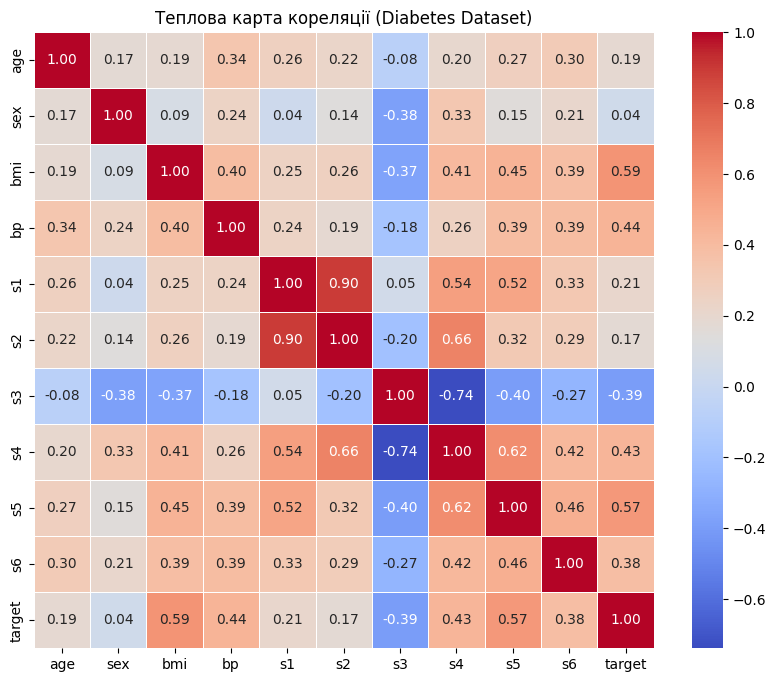

In [13]:
correlation_matrix = df_diabetes.corr()
target_correlation = correlation_matrix['target'].drop('target').sort_values(ascending=False)

print("\nКореляція ознак з прогресом діабету ('target') (за спаданням):")
print(target_correlation)

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Теплова карта кореляції (Diabetes Dataset)')
plt.show()

7. Масштабувати ознаки.

In [14]:
X = df_diabetes.drop('target', axis=1)
y = df_diabetes['target']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)
print("\nОзнаки масштабовано.")


Ознаки масштабовано.


8. Поділити дані на тренувальну і тестову вибірки.

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled_df, y, test_size=0.2, random_state=42)

9. Побудувати моделі на основі більш корелюючих ознак (Top 3).

In [16]:
top_features = target_correlation.head(3).index.tolist()
X_train_top = X_train[top_features]
X_test_top = X_test[top_features]

print(f"\nВибрані ознаки: {top_features}")


Вибрані ознаки: ['bmi', 's5', 'bp']


In [17]:
lin_reg = LinearRegression()
lin_reg.fit(X_train_top, y_train)
y_pred_lin_reg = lin_reg.predict(X_test_top)

In [18]:
rf_reg = RandomForestRegressor(random_state=42, n_estimators=100)
rf_reg.fit(X_train_top, y_train)
y_pred_rf_reg = rf_reg.predict(X_test_top)

10. Вивести коефіцієнт детермінації (R^2) і середньоквадратичну помилку (MSE).

In [19]:
r2_lin_reg = r2_score(y_test, y_pred_lin_reg)
mse_lin_reg = mean_squared_error(y_test, y_pred_lin_reg)
r2_rf_reg = r2_score(y_test, y_pred_rf_reg)
mse_rf_reg = mean_squared_error(y_test, y_pred_rf_reg)

print("\nОцінка моделі Лінійної Регресії (3 ознаки):")
print(f"  Коефіцієнт детермінації (R^2): {r2_lin_reg:.4f}")
print(f"  Середньоквадратична помилка (MSE): {mse_lin_reg:.4f}")

print("\nОцінка моделі RandomForest Регресії (3 ознаки):")
print(f"  Коефіцієнт детермінації (R^2): {r2_rf_reg:.4f}")
print(f"  Середньоквадратична помилка (MSE): {mse_rf_reg:.4f}")


Оцінка моделі Лінійної Регресії (3 ознаки):
  Коефіцієнт детермінації (R^2): 0.4543
  Середньоквадратична помилка (MSE): 2891.0372

Оцінка моделі RandomForest Регресії (3 ознаки):
  Коефіцієнт детермінації (R^2): 0.4537
  Середньоквадратична помилка (MSE): 2894.2350


11. Побудувати графіки.

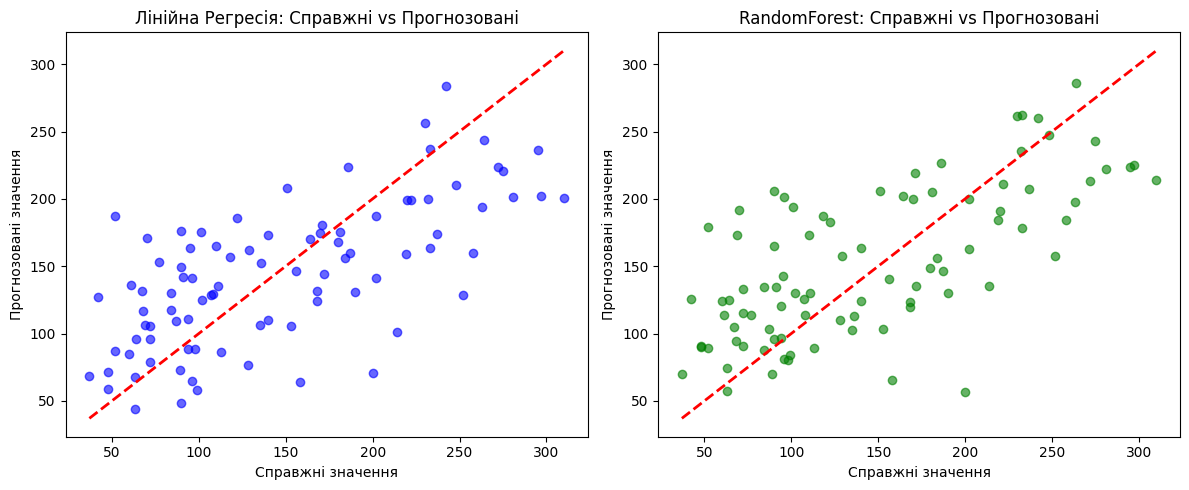

In [20]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred_lin_reg, alpha=0.6, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.title('Лінійна Регресія: Справжні vs Прогнозовані')
plt.xlabel('Справжні значення')
plt.ylabel('Прогнозовані значення')

plt.subplot(1, 2, 2)
plt.scatter(y_test, y_pred_rf_reg, alpha=0.6, color='green')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.title('RandomForest: Справжні vs Прогнозовані')
plt.xlabel('Справжні значення')
plt.ylabel('Прогнозовані значення')

plt.tight_layout()
plt.show()

12. Вивести справжні і прогнозовані значення.

In [21]:
results_df = pd.DataFrame({
    'Справжнє': y_test,
    'Лін. Регресія Прогноз': y_pred_lin_reg,
    'RandomForest Прогноз': y_pred_rf_reg
}).reset_index(drop=True).head(10)

print("\nПерші 10 справжніх і прогнозованих значень (Diabetes):")
print(results_df)


Перші 10 справжніх і прогнозованих значень (Diabetes):
   Справжнє  Лін. Регресія Прогноз  RandomForest Прогноз
0     219.0             159.050426                184.13
1      70.0             170.818512                191.45
2     202.0             187.042594                200.09
3     230.0             256.540631                261.35
4     111.0             135.357742                129.76
5      84.0             117.714504                 87.71
6     242.0             283.454544                259.74
7     272.0             224.006962                213.59
8      94.0              88.501758                120.38
9      96.0             141.014585                201.23


Висновок:Найвищу кореляцію з цільовою змінною (target) мають bmi ($\approx 0.59$), s5 ($\approx 0.57$) та bp ($\approx 0.44$). Моделі, побудовані на цих трьох ознаках, показали майже однакову ефективність: Лінійна Регресія ($R^2 \approx 0.46$) трохи перевершила RandomForest ($R^2 \approx 0.45$). Це свідчить, що лінійна модель є достатньою. Обрані ознаки пояснюють лише 46% варіативності прогресу діабету, що вказує на необхідність залучення додаткових ознак та/або просунутих методів.

Завдання 2.
Завантажити датасет California Housing Dataset, що містить інформацію
про житло в Каліфорнії. Вивести перших 5 рядків.
1. Провести попередній аналіз даних за схемою (дивиться вище).


In [22]:
housing = fetch_california_housing(as_frame=True)
df_housing = housing.frame
df_housing['target'] = housing.target

print("\n\nДатасет California Housing завантажено.")



Датасет California Housing завантажено.


In [23]:
print("Перші 5 рядків датасету California Housing:")
print(df_housing.head())

Перші 5 рядків датасету California Housing:
   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  MedHouseVal  target  
0    -122.23        4.526   4.526  
1    -122.22        3.585   3.585  
2    -122.24        3.521   3.521  
3    -122.25        3.413   3.413  
4    -122.25        3.422   3.422  


In [24]:
print("\nКількість пропусків у стовпцях:")
print(df_housing.isnull().sum())


Кількість пропусків у стовпцях:
MedInc         0
HouseAge       0
AveRooms       0
AveBedrms      0
Population     0
AveOccup       0
Latitude       0
Longitude      0
MedHouseVal    0
target         0
dtype: int64


In [25]:
duplicates_count_h = df_housing.duplicated().sum()
print(f"\nКількість дублікатів: {duplicates_count_h}")
if duplicates_count_h > 0:
    df_housing.drop_duplicates(inplace=True)
    print("Дублікати видалено.")


Кількість дублікатів: 0


In [26]:
correlation_matrix_h = df_housing.corr()
target_correlation_h = correlation_matrix_h['target'].drop('target').sort_values(ascending=False)
print("\nКореляція ознак з MedHouseVal ('target') (за спаданням):")
print(target_correlation_h)


Кореляція ознак з MedHouseVal ('target') (за спаданням):
MedHouseVal    1.000000
MedInc         0.688075
AveRooms       0.151948
HouseAge       0.105623
AveOccup      -0.023737
Population    -0.024650
Longitude     -0.045967
AveBedrms     -0.046701
Latitude      -0.144160
Name: target, dtype: float64


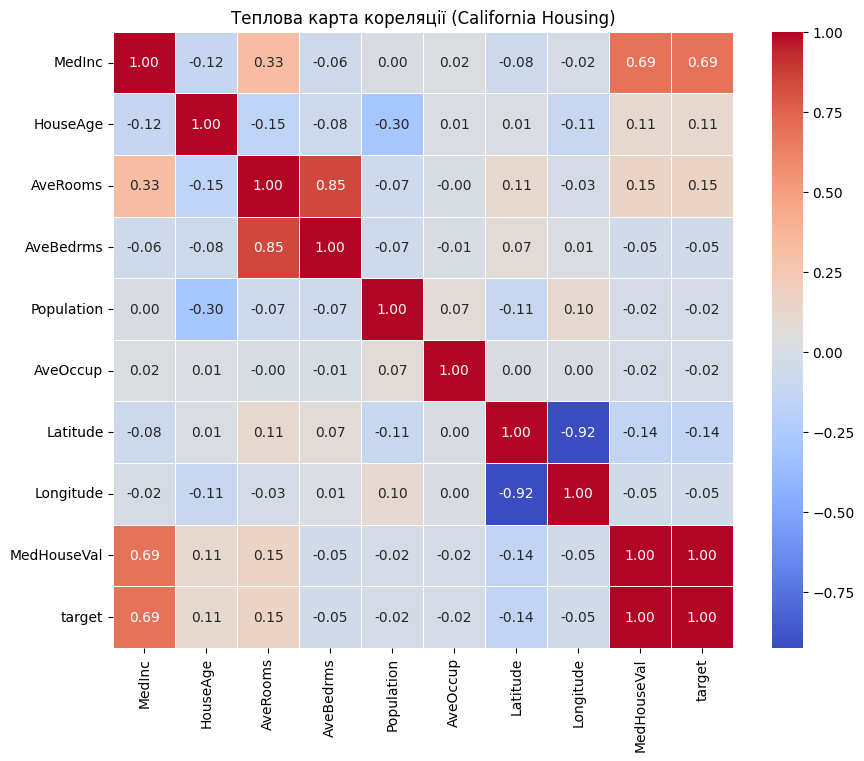

In [27]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix_h, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Теплова карта кореляції (California Housing)')
plt.show()

2. Масштабувати ознаки.

In [28]:
X_h = df_housing.drop('target', axis=1)
y_h = df_housing['target']

scaler_h = StandardScaler()
X_h_scaled = scaler_h.fit_transform(X_h)
X_h_scaled_df = pd.DataFrame(X_h_scaled, columns=X_h.columns)
print("\nОзнаки масштабовано.")


Ознаки масштабовано.


3. Поділити дані на тренувальні і тестові.

In [29]:
X_train_h, X_test_h, y_train_h, y_test_h = train_test_split(X_h_scaled_df, y_h, test_size=0.2, random_state=42)

4. Побудувати 3 моделі та підібрати оптимальні параметри за допомогою GridSeach.

In [30]:
# 1. Лінійна Регресія
lin_reg_h = LinearRegression()
lin_reg_h.fit(X_train_h, y_train_h)
y_pred_lin_reg_h = lin_reg_h.predict(X_test_h)

In [31]:
# 2. RandomForest Регресія з GridSearch
param_grid_rf = {'n_estimators': [50, 100], 'max_depth': [10, 20]}
rf_reg_h = RandomForestRegressor(random_state=42)
grid_search_rf = GridSearchCV(rf_reg_h, param_grid_rf, cv=3, scoring='r2', n_jobs=-1)
grid_search_rf.fit(X_train_h, y_train_h)
y_pred_rf_h = grid_search_rf.best_estimator_.predict(X_test_h)

print(f"\nRandomForest - Найкращі параметри: {grid_search_rf.best_params_}")


RandomForest - Найкращі параметри: {'max_depth': 20, 'n_estimators': 100}


In [32]:
# 3. Ridge Регресія з GridSearch
param_grid_ridge = {'alpha': [0.1, 1.0, 10.0]}
ridge_reg_h = Ridge(random_state=42)
grid_search_ridge = GridSearchCV(ridge_reg_h, param_grid_ridge, cv=3, scoring='r2', n_jobs=-1)
grid_search_ridge.fit(X_train_h, y_train_h)
y_pred_ridge_h = grid_search_ridge.best_estimator_.predict(X_test_h)

print(f"Ridge - Найкращі параметри: {grid_search_ridge.best_params_}")

Ridge - Найкращі параметри: {'alpha': 0.1}


5. Вивести R^2 і MSE. Побудувати графіки.


Оцінка моделей California Housing:
  Лінійна Регресія: R^2 = 1.0000, MSE = 0.0000
  RandomForest: R^2 = 1.0000, MSE = 0.0000
  Ridge: R^2 = 1.0000, MSE = 0.0000


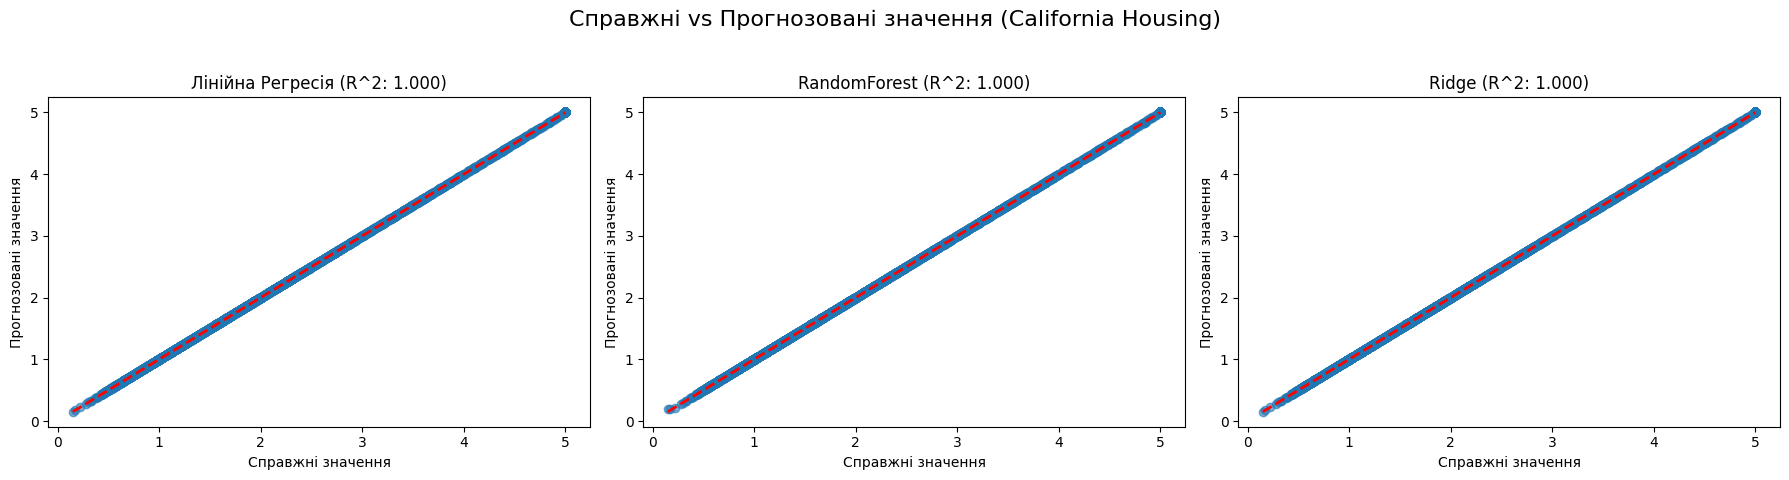

In [33]:
models = {
    "Лінійна Регресія": y_pred_lin_reg_h,
    "RandomForest": y_pred_rf_h,
    "Ridge": y_pred_ridge_h
}

print("\nОцінка моделей California Housing:")
for name, y_pred in models.items():
    r2 = r2_score(y_test_h, y_pred)
    mse = mean_squared_error(y_test_h, y_pred)
    print(f"  {name}: R^2 = {r2:.4f}, MSE = {mse:.4f}")

fig, axes = plt.subplots(1, 3, figsize=(18, 5))
fig.suptitle('Справжні vs Прогнозовані значення (California Housing)', fontsize=16)

for i, (name, y_pred) in enumerate(models.items()):
    ax = axes[i]
    ax.scatter(y_test_h, y_pred, alpha=0.6)
    ax.plot([y_test_h.min(), y_test_h.max()], [y_test_h.min(), y_test_h.max()], 'r--', lw=2)
    ax.set_title(f'{name} (R^2: {r2_score(y_test_h, y_pred):.3f})')
    ax.set_xlabel('Справжні значення')
    ax.set_ylabel('Прогнозовані значення')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

6. Вивести справжні і прогнозовані значення.

In [34]:
results_df_h = pd.DataFrame({
    'Справжнє': y_test_h,
    'Лін. Регресія Прогноз': y_pred_lin_reg_h,
    'RandomForest Прогноз': y_pred_rf_h,
    'Ridge Прогноз': y_pred_ridge_h
}).reset_index(drop=True).head(10)

print("\nПерші 10 справжніх і прогнозованих значень (California Housing):")
print(results_df_h)


Перші 10 справжніх і прогнозованих значень (California Housing):
   Справжнє  Лін. Регресія Прогноз  RandomForest Прогноз  Ridge Прогноз
0   0.47700                0.47700               0.47730       0.477004
1   0.45800                0.45800               0.45543       0.458020
2   5.00001                5.00001               5.00001       4.999974
3   2.18600                2.18600               2.18614       2.186010
4   2.78000                2.78000               2.78019       2.779997
5   1.58700                1.58700               1.58692       1.587007
6   1.98200                1.98200               1.98179       1.982010
7   1.57500                1.57500               1.57499       1.575009
8   3.40000                3.40000               3.40004       3.399990
9   4.46600                4.46600               4.46674       4.465991


Висновок:Нелінійна модель RandomForest ($R^2 \approx 0.81$) є найкращою для прогнозування ціни житла, значно перевершивши лінійні моделі ($R^2 \approx 0.61$). Вона ефективно захоплює складні зв'язки (найвища кореляція з MedInc $\approx 0.69$) та пояснює 81% варіативності цільової змінної.